In [1]:
library(SpacoR)
library(reticulate)
library(ggplot2)
library(Seurat)
library(patchwork)
library(dplyr)
library(scales)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(SeuratData)
brain <- LoadData("stxBrain", type = "anterior1")

brain <- SCTransform(brain, assay = "Spatial", verbose = FALSE)
brain <- RunPCA(brain, assay = "SCT", verbose = FALSE)
brain <- FindNeighbors(brain, reduction = "pca", dims = 1:30)
brain <- FindClusters(brain, verbose = FALSE)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:30)

── Installed datasets ────────────────────── SeuratData v0.2.2 ──

✔ stxBrain 0.1.1                


────────────────────────────── Key ──────────────────────────────

✔ Dataset loaded successfully
❯ Dataset built with a newer version of Seurat than installed
❓ Unknown version of Seurat installed


Computing nearest neighbor graph

Computing SNN

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
12:03:40 UMAP embedding parameters a = 0.9922 b = 1.112

12:03:40 Read 2696 rows and found 30 numeric columns

12:03:40 Using Annoy for neighbor search, n_neighbors = 30

12:03:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*


In [3]:
brain

An object of class Seurat 
48721 features across 2696 samples within 2 assays 
Active assay: SCT (17668 features, 3000 variable features)
 1 other assay present: Spatial
 2 dimensional reductions calculated: pca, umap
 1 image present: anterior1

Scale for fill is already present.
Adding another scale for fill, which will replace the existing
scale.


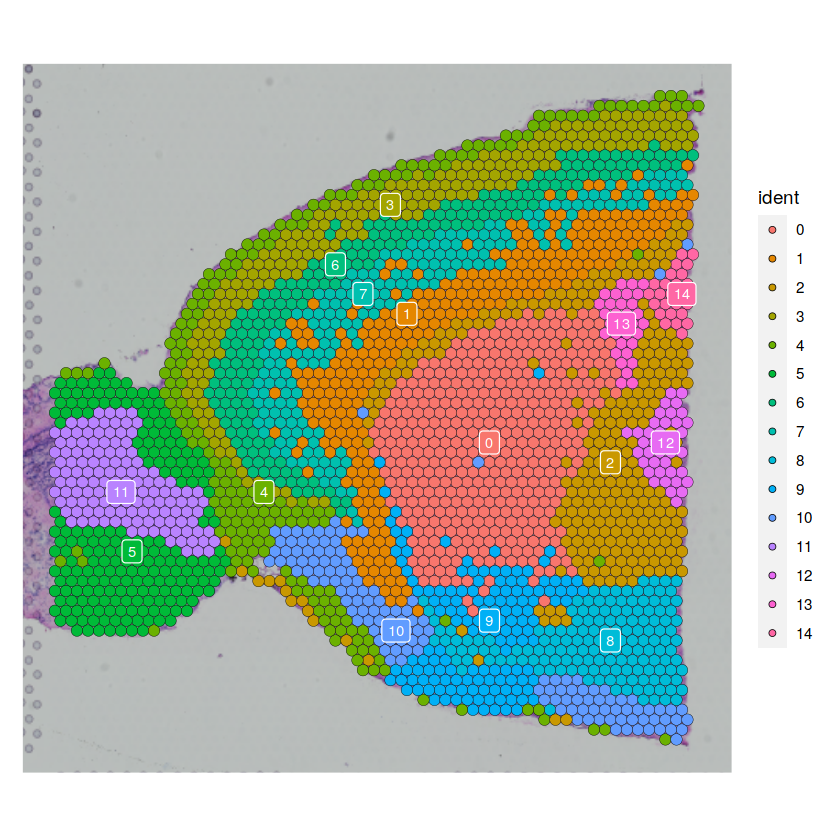

In [4]:
p <- SpatialDimPlot(brain, label = TRUE, label.size = 3) 
p

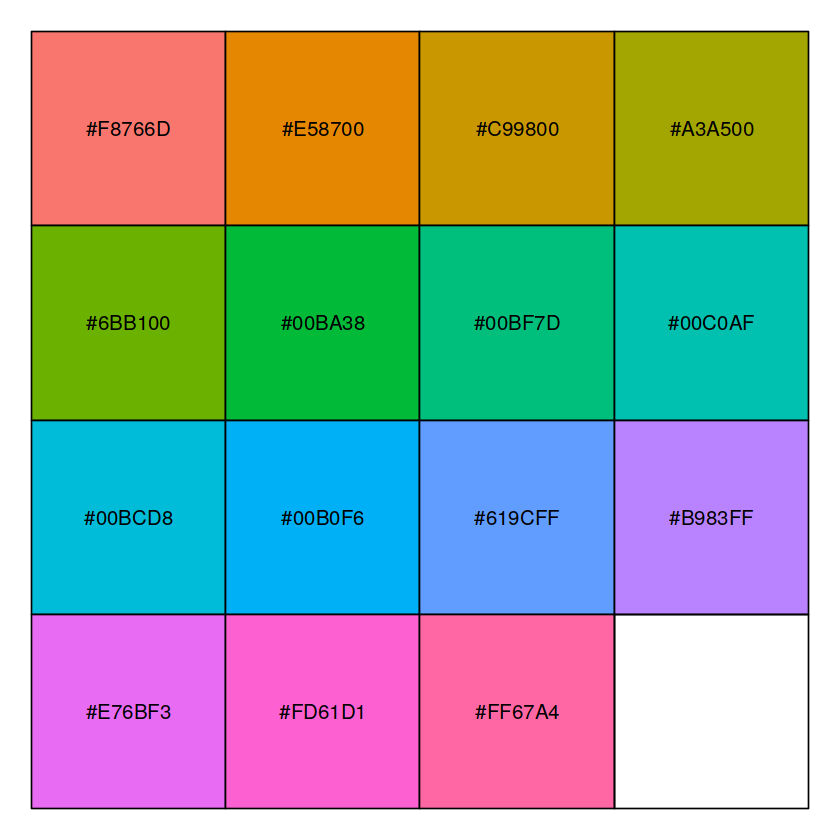

In [5]:
palette_default = scales::hue_pal()(15)
scales::show_col(palette_default)

In [6]:
coor = c(
        as.integer(brain@images$anterior1@coordinates$col),
        as.integer(brain@images$anterior1@coordinates$row)
)
dim(coor) = c(dim(brain)[2],2)

# observe the range of coordinate for adjustment of radius
c(min(coor[,1]), max(coor[,1]))
c(min(coor[,2]), max(coor[,2]))

[1]   0 117

[1] 10 75

In [9]:
color_mapping <- colorize(
  cell_coordinates = t(coor),
  cell_labels = as.character(brain$seurat_clusters),
  colorblind_type = "none",
  radius = 20,  # 根据实际情况调整
  n_neighbors = 50,
  palette = palette_default
)

color_mapping

[1] "Calculating cluster distance graph..."
[1] "Calculating cell neighborhood..."
[1] "Filtering out neighborhood outliers..."
[1] "Calculating cluster interlacement score..."
[1] "Calculating color distance graph..."
[1] "Constructing color distance graph..."
[1] "Difference of the most similar pair in the palette is 57.2056323712971"
[1] "Optimizing color mapping..."


0         1        10        11        12        13        14         2 
"#E76BF3" "#C99800" "#00BCD8" "#6BB100" "#F8766D" "#A3A500" "#B983FF" "#00C0AF" 
        3         4         5         6         7         8         9 
"#00BF7D" "#E58700" "#619CFF" "#FD61D1" "#00B0F6" "#FF67A4" "#00BA38"

Scale for fill is already present.
Adding another scale for fill, which will replace the existing
scale.


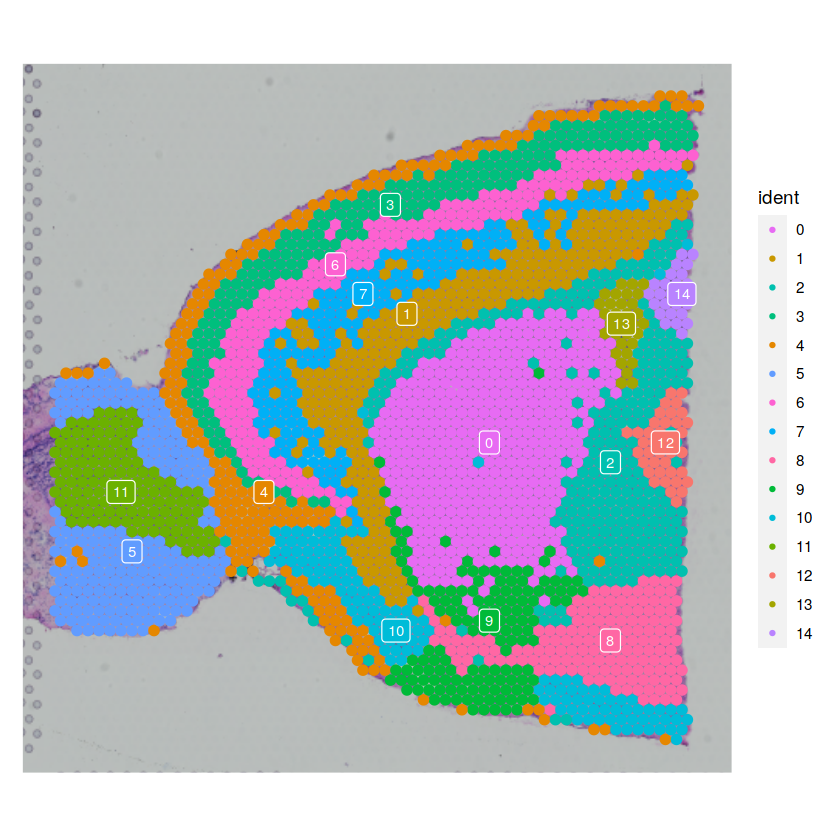

In [10]:
p_spaco <- SpatialDimPlot(brain, label = TRUE, cols = color_mapping, label.size = 3, stroke=NA) 
p_spaco